In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train_data = pd.read_csv("../data/digits_train_sample.csv")
test_data = pd.read_csv("../data/digits_test_sample.csv")

In [46]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
train_data.shape

(6000, 785)

In [48]:
train_data.describe(np.arange(.1,1,.1))

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,6000.0000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.0,6000.0,6000.0
mean,4.5155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.177000,0.079667,0.116000,0.078833,0.052667,0.010333,0.0,0.0,0.0,0.0
std,2.9111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.105913,2.492393,5.114317,4.024216,3.227842,0.800417,0.0,0.0,0.0,0.0
min,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
20%,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
30%,2.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
40%,3.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,5.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
60%,6.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [49]:
train_data.isnull().sum().sum()

0

In [50]:
train_data['label'].value_counts()

7    677
1    671
8    628
0    603
9    594
6    591
3    583
2    567
4    546
5    540
Name: label, dtype: int64

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

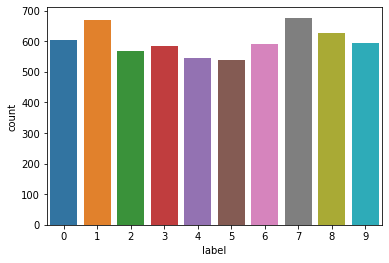

In [51]:
sns.countplot(train_data["label"])

In [52]:
train_data.iloc[0]

label    3
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 785, dtype: int64

Text(0.5, 1.0, 'Digit 3')

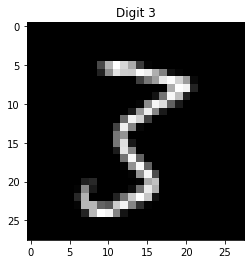

In [53]:
three = train_data.iloc[0, 1:]
three = three.values.reshape(28,28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")

In [54]:
digito=train_data.iloc[10, 1:]

In [55]:
digito.values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  20, 111, 189, 151,  63,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, 'Digit ')

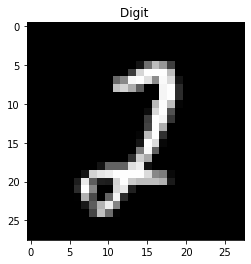

In [56]:
digit = train_data.iloc[10, 1:]
digit=digit.values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

Text(0.5, 1.0, 'Digit ')

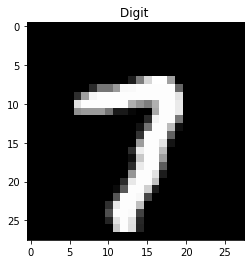

In [14]:
digit = train_data.iloc[100, 1:]
digit=digit.values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

In [57]:
X = train_data[[x for x in train_data.columns if x != "label"]]
y = train_data[["label"]]

In [58]:
X = X/255.0
test_data = test_data/255.0

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [60]:
X_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.neural_network import MLPClassifier

In [61]:
mlp = MLPClassifier(max_iter=100)

In [62]:
mlp.fit(X_train, y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(max_iter=100)

In [22]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [23]:
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [24]:
metricas(mlp,X_test,y_test)

 Acc Validate: 0.936
 Matrix Conf Validate:  
 [[177   0   0   0   0   1   0   1   3   0]
 [  0 200   2   1   0   1   0   1   2   1]
 [  0   0 158   3   2   0   2   1   2   0]
 [  1   2   7 164   0   5   0   3   4   2]
 [  1   0   0   0 146   0   2   0   0   5]
 [  1   0   3   3   0 150   0   1   2   0]
 [  0   0   3   0   0   5 164   0   0   0]
 [  1   1   3   1   2   0   0 188   0   2]
 [  1   0   2   2   1   2   1   0 172   4]
 [  0   2   1   1   4   1   0   9   2 165]]


In [25]:
ls_scores = cross_val_score(estimator=mlp, scoring="accuracy", X=X_train, y=y_train, cv=4, n_jobs=-1)
np.mean(ls_scores), np.std(ls_scores)

(0.9257142857142857, 0.0072843135908468425)

In [63]:
MLPClassifier?

In [27]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
search = RandomizedSearchCV(param_distributions=param_grid, cv=2, n_jobs=-1, scoring="accuracy", estimator=mlp, n_iter=10, verbose=5)

In [30]:
search.fit(X=X_train, y=y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:   49.3s remaining:   49.3s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:   56.8s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % sel

RandomizedSearchCV(cv=2, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam']},
                   scoring='accuracy', verbose=5)

In [31]:
model_best=search.best_estimator_

In [32]:
search.best_score_

0.9104761904761904

In [33]:
search.score(X_test, y_test)

0.9377777777777778

In [34]:
model_best

MLPClassifier(max_iter=100)

In [35]:
y_pred=model_best.predict(X_test)

In [36]:
y_pred[-1]

1

In [37]:
y_test

,label
1779,8
1598,6
1086,8
3726,0
2634,4
...,...
2824,3
5843,3
5338,9
5339,6


In [38]:
X_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 La predicción es 8


Text(0.5, 1.0, 'Digit ')

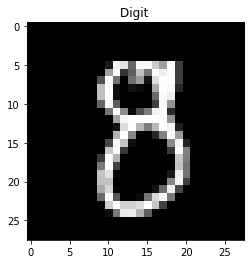

In [39]:
print(f' La predicción es {y_pred[0]}')
digit=X_test.iloc[[0]].values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

 La predicción es 1


Text(0.5, 1.0, 'Digit ')

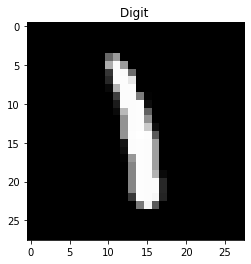

In [40]:
print(f' La predicción es {y_pred[-1]}')
digit=X_test.iloc[[-1]].values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

In [41]:
model_best.predict(np.array(test_data.iloc[1,1:]).reshape(1, -1))[-1]

2

 La predicción es 2


Text(0.5, 1.0, 'Digit ')

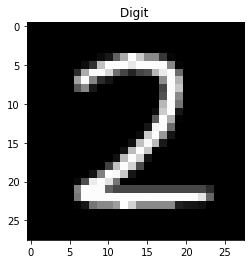

In [42]:
print(f' La predicción es {model_best.predict(np.array(test_data.iloc[1,1:]).reshape(1, -1))[-1]}')
digit=test_data.iloc[1,1:].values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

 La predicción es 8


Text(0.5, 1.0, 'Digit ')

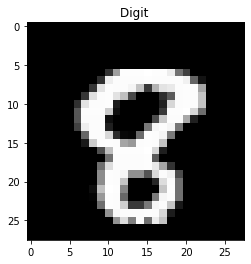

In [43]:
print(f' La predicción es {model_best.predict(np.array(test_data.iloc[25,1:]).reshape(1, -1))[-1]}')
digit=test_data.iloc[25,1:].values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")